# A DESCRIPTIVE STUDY ON NEW ONSET OF EPILEPSY IN CHILDREN ADULTS AND ADOLESCENT

As a passionate data analyst, I conducted an independent comprehensive research project focusing on the new onset of epilepsy in children, adolescents, and adults. Utilizing Python and SQL, I performed in-depth data analysis to derive meaningful insights from diverse datasets.

Key highlights of the project include:

Data Manipulation and Cleaning: Employed Python libraries such as Pandas and NumPy to preprocess and clean the data for accurate analysis.

Statistical Analysis: Applied techniques including Chi-square tests and ANOVA to identify significant differences in seizure types across age groups.

Data Visualization: Created informative visualizations using Matplotlib and Seaborn to effectively communicate findings, enhancing stakeholder understanding.

SQL Queries: Leveraged SQL for data extraction and transformation, facilitating efficient analysis of large datasets.

This project not only honed my analytical skills but also equipped me with the ability to translate complex data into actionable insights, making me a strong candidate for data analyst roles.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [8]:
username = '**********'
password = '**********'
host =  '***********'
database = '***********'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

# DATA TABLE

Following is the data that I have collected which I will analysing to get meaningful insights

In [10]:
query = """select * from nos_project;"""
df_data_table = pd.read_sql(query, con =engine)
df_data_table

,case no.,Category,Patient Name,Age,Sex,Chief Complaints,Risk Factors,Type of seizure,Brain Scan,Medications,EEG,Comorbidities,Metabolic profile
0,1,Children,ggh,8,M,"Recurrent seizures, loss of consciousness",Family history,Generalized tonic-clonic,MRI: cortical dysplasia,Sod. valproate,Normal,None,Hypocalcemia
1,2,Children,ffg,9,M,"Sudden jerking movements, loss of consciousness",premature birth,Myoclonic seizures,CT scan:Arterivenous malformation,carbamazepine,Abnormal,None,normal
2,3,Children,mnb,11,M,"Brief episodes of blinking, lip-smacking",None identified,Complex partial seizures,MRI: Arachenoid cyst,Clobazam,Normal,Diabetes,hyperglycemia
3,4,Children,jjh,7,M,"Frequent seizures, sudden loss of consciousness",Head injury,Partial seizures,MRI: Brain contusions,Sod. valproate,Abnormal,PH of head trauma,normal
4,5,Children,xxx,9,M,Jerking movements of arms and legs,Febrile seizures in infancy,Absence seizures,MRI: hippocampal sclerosis,Levetiracetam,Abnormal,None,hyponatremia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,Adolescent,aaa,15,F,Atonic seizures,None,Atonic seizures,Hippocampal sclerosis,Topiramate,Abnormal,None,Normal
106,107,Adolescent,bbb,16,M,"Frequent seizures, loss of consciousness",Family history,Generalized tonic-clonic,Normal,Valproic acid,Normal,None,hypocalcemia
107,108,Adolescent,ccc,19,F,Simple partial seizures,None,Simple partial seizures,Cortical dysplasia,Carbamazepine,Abnormal,None,Normal
108,109,Adolescent,eee,16,M,Complex partial seizures,None,Complex partial seizures,Normal,Levetiracetam,Abnormal,None,hypokalemia


# DATA CLEANING

 Before analysing the data we need to check if the data is clean or not 

# FINDING NULL VALUES

In [117]:
print(df_data_table.isnull().sum())

case no.             0
Category             0
Patient Name         0
Age                  0
Sex                  0
Chief Complaints     0
Risk Factors         0
Type of seizure      0
Brain Scan           0
Medications          0
EEG                  0
Comorbidities        0
Metabolic profile    0
dtype: int64


# REMOVING DUPLICATE VALUES

In [109]:
print ("The identified duplicate row in the Data table is" ,df_data_table.drop_duplicates(inplace= True))

The identified duplicate row in the Data table is None


# Correct Data Types

In [125]:
print( df_data_table.dtypes)

case no.              int64
Category             object
Patient Name         object
Age                   int64
Sex                  object
Chief Complaints     object
Risk Factors         object
Type of seizure      object
Brain Scan           object
Medications          object
EEG                  object
Comorbidities        object
Metabolic profile    object
dtype: object


# Handle outliers


In [127]:
from scipy import stats
df_data_table=df_data_table[(abs(stats.zscore(df_data_table['Age'])) <=3)]

print( "Number of outliers in Age column is ",outliers.sum())


Number of outliers in Age column is  0


In [234]:
df_data_table.columns


Index(['case no.', 'Category', 'Patient Name', 'Age', 'Sex',
       'Chief Complaints', 'Risk_Factors', 'Type_of_seizure', 'Brain_Scan',
       'Medications', 'EEG', 'Comorbidities', 'Metabolic_profile'],
      dtype='object')

# Handle Categorical Data

In [208]:
print(df_data_table['Type_of_seizure'].unique()) 


['Generalized tonic-clonic ' 'Myoclonic seizures'
 'Complex partial seizures' 'Partial seizures' 'Absence seizures'
 'Atonic epilepsy' 'Tonic seizures' 'clonic seizures'
 'Generalized tonic-clonic' 'Atonic seizures' 'Simple partial seizures']


 The data is found to be free of any inconsistencies and ready for EDA

# EXPLORATORY DATA ANALYSIS

# 1. Age-Group Distribution

In [165]:
#Number of subjects in each age group of our study cohort


query=""" select category,count(*) as count from nos_project
group by category 
;"""

df_age_distribution =  pd.read_sql(query, con =engine)
df_age_distribution.head()


,category,count
0,Children,40
1,Adult,40
2,Adolescent,30


# 2. Gender Distribution

In [58]:
# Count of Male, Female, and Others in the study cohort

query=""" select sex,count(*) as count from nos_project
group by sex
;"""

df_gender_distribution =  pd.read_sql(query, con =engine)
df_gender_distribution.head()


,sex,count
0,M,69
1,F,41


 There are 69 Male subjects and 41 Female subjects in our study cohort


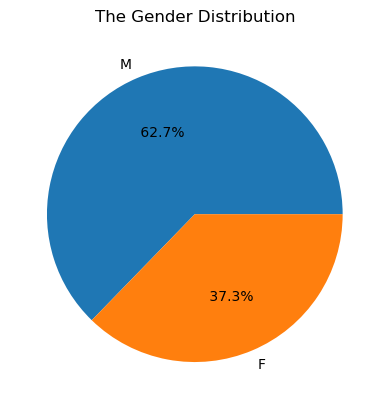

In [288]:
plt.pie( df_gender_distribution['count'],  labels=df_gender_distribution['sex'], autopct=' %1.1f%%')
plt.title("The Gender Distribution")
print(" There are 69 Male subjects and 41 Female subjects in our study cohort")

# 3. Distribution of seizure types across different age categories (Children, Adolescents, Adults)

# children

In [195]:
query="""SELECT `Type of seizure`, COUNT(*) as seizure_count
FROM nos_project
WHERE category = 'children'
GROUP BY `Type of seizure`
order by seizure_count desc
;"""
df_epityp =  pd.read_sql(query, con =engine)
df_epityp.head()

,Type of seizure,seizure_count
0,Absence seizures,14
1,Generalized tonic-clonic,12
2,Myoclonic seizures,3
3,Complex partial seizures,3
4,Atonic epilepsy,3


Text(0.5, 1.0, 'Distribution of seizure types across in children')

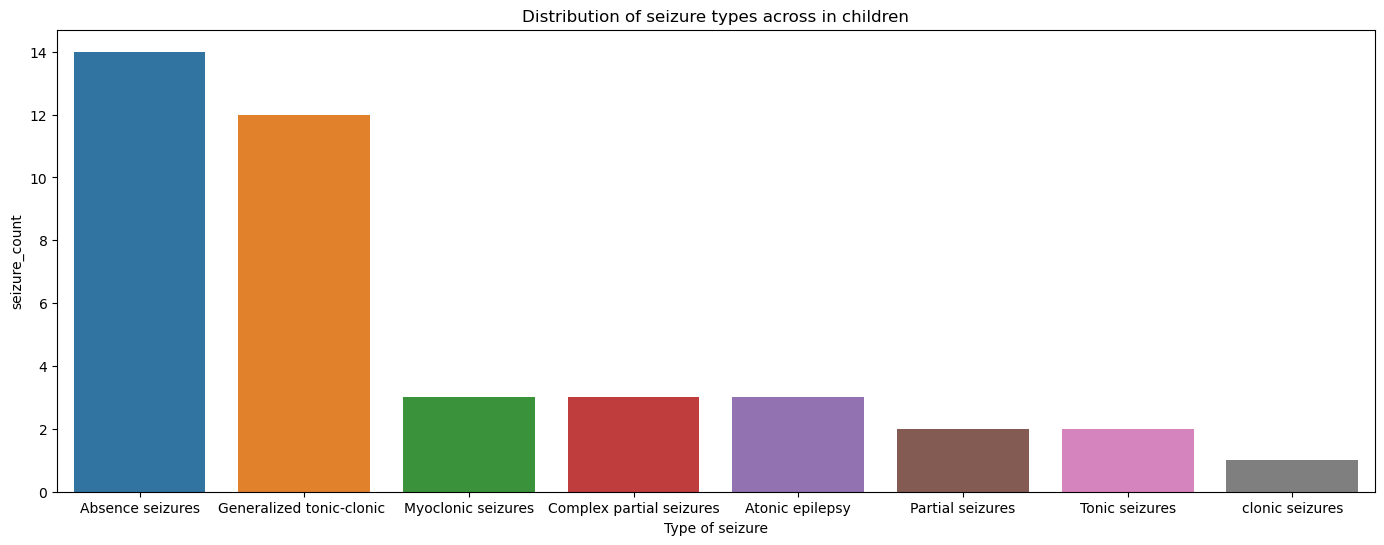

In [197]:
plt.figure(figsize= (17 , 6))

sns.barplot( x= 'Type of seizure', y = 'seizure_count',  hue='Type of seizure', data = df_epityp)
plt.title('Distribution of seizure types across in children')


bsence seizures (14 cases): This is the most common type of seizure in children from the dataset, often characterized by brief periods of staring or subtle body movements, which may go unnoticed.

Generalized tonic-clonic seizures (12 cases): These involve the entire brain and result in loss of consciousness, convulsions, and muscle stiffness, making them a prominent concern for children.

Myoclonic seizures (3 cases): These are less frequent but involve sudden, brief jerks or twitches of muscles, possibly indicating early epilepsy syndromes.

Complex partial seizures (3 cases): These involve a loss of awareness and may cause unusual behavior or movements.

Atonic epilepsy (3 cases): Characterized by sudden loss of muscle tone, leading to falls or "drop attacks," this is less common but can cause significant injury.

Overall, the dataset suggests that absence and generalized tonic-clonic seizures are the predominant types in children, requiring focused management and intervention.

# ADULTS

In [189]:
query="""select  `Type of seizure`, count(*) as seizure_count from nos_project
where category = 'adult' 
group by `Type of seizure`
order by seizure_count desc;"""
df_adt =  pd.read_sql(query, con =engine)
df_adt.head()

,Type of seizure,seizure_count
0,Generalized tonic-clonic,15
1,Complex partial seizures,9
2,Myoclonic seizures,5
3,Atonic seizures,4
4,Simple partial seizures,4


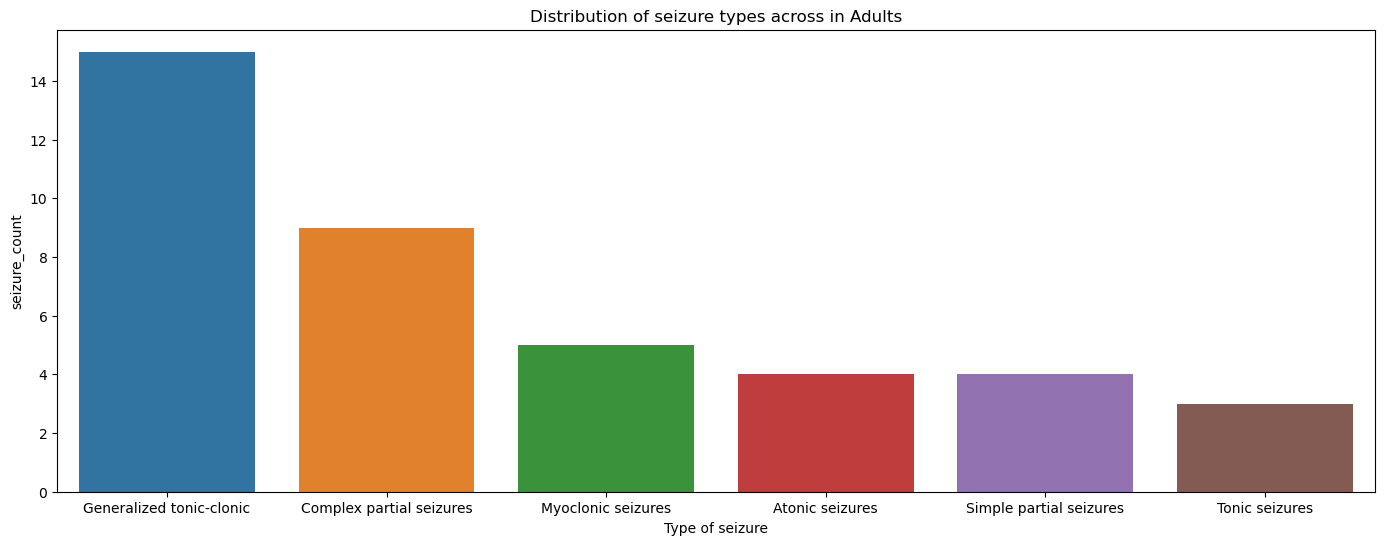

In [191]:
plt.figure(figsize= (17 , 6))
sns.barplot( x=  'Type of seizure', y =  'seizure_count', hue='Type of seizure', data = df_adt) 
plt.title('Distribution of seizure types across in Adults')
print()

Generalized tonic-clonic seizures (15 cases): These seizures are the most frequent in adults from the dataset, involving the entire brain and causing convulsions and unconsciousness. Managing this seizure type is critical due to its severe impact.

Complex partial seizures (9 cases): These seizures involve a loss of consciousness or awareness and can cause repetitive or strange movements. They are the second most common type in adults and require careful monitoring.

Myoclonic seizures (5 cases): These involve sudden, brief jerks or muscle twitches and may be indicative of more serious underlying conditions.

Atonic seizures (4 cases): Characterized by sudden muscle tone loss, these can lead to falls and injuries.

Simple partial seizures (4 cases): These seizures do not cause a loss of consciousness and may involve sensory or motor symptoms, though they are less frequent in adults.

Overall, generalized tonic-clonic and complex partial seizures dominate the adult category, highlighting the need for effective treatment strategies for these seizure types.

# ADOLESCENTS

In [181]:
query=""" select `Type of seizure`, count(*) as seizure_count from nos_project
where category = 'Adolescent'
group by `Type of seizure`
order by seizure_count desc;"""

df_adl = pd.read_sql(query, con =engine)
df_adl.head()

,Type of seizure,seizure_count
0,Generalized tonic-clonic,10
1,Complex partial seizures,8
2,Absence seizures,3
3,Myoclonic seizures,3
4,Atonic seizures,3


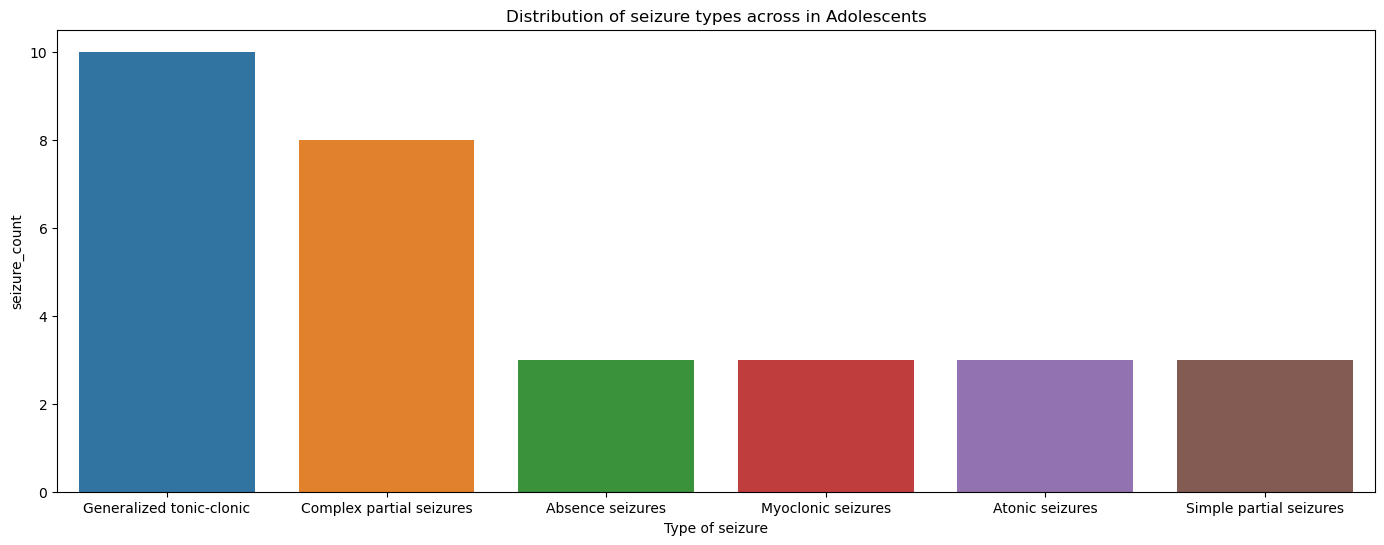

In [183]:
plt.figure(figsize= (17 , 6))
sns.barplot( x=  'Type of seizure', y =  'seizure_count',  hue='Type of seizure', data = df_adl) 
plt.title('Distribution of seizure types across in Adolescents')
print()

Generalized tonic-clonic seizures (10 cases): These are the most common seizures in adolescents, causing sudden loss of consciousness and convulsions, requiring immediate medical attention.

Complex partial seizures (8 cases): Involve confusion and loss of awareness, with the potential for repetitive movements, making them the second most frequent in this age group.

Absence seizures (3 cases): These seizures cause brief lapses in awareness and are less common, but important to monitor, especially in educational and social settings.

Myoclonic seizures (3 cases): These sudden, involuntary muscle jerks are similar in frequency to absence seizures and can be indicative of other neurological conditions.

Atonic seizures (3 cases): Sudden muscle weakness or loss of muscle tone, leading to falls, are equally rare but concerning for safety reasons.

In adolescents, generalized tonic-clonic and complex partial seizures are the most prominent types, indicating that these two require focused treatment and management.

# 4. The most common risk factors for epilepsy in each age group

# CHILDREN

In [177]:
query="""SELECT `Risk Factors`, COUNT(*) as Risk_count
FROM nos_project
WHERE category = 'children'
GROUP BY`Risk Factors` 
order by Risk_count desc
;"""
df_risk =  pd.read_sql(query, con =engine)
df_risk.head()

,Risk Factors,Risk_count
0,None identified,12
1,Febrile seizures in infancy,7
2,CNS infection,7
3,premature birth,6
4,Head injury,5


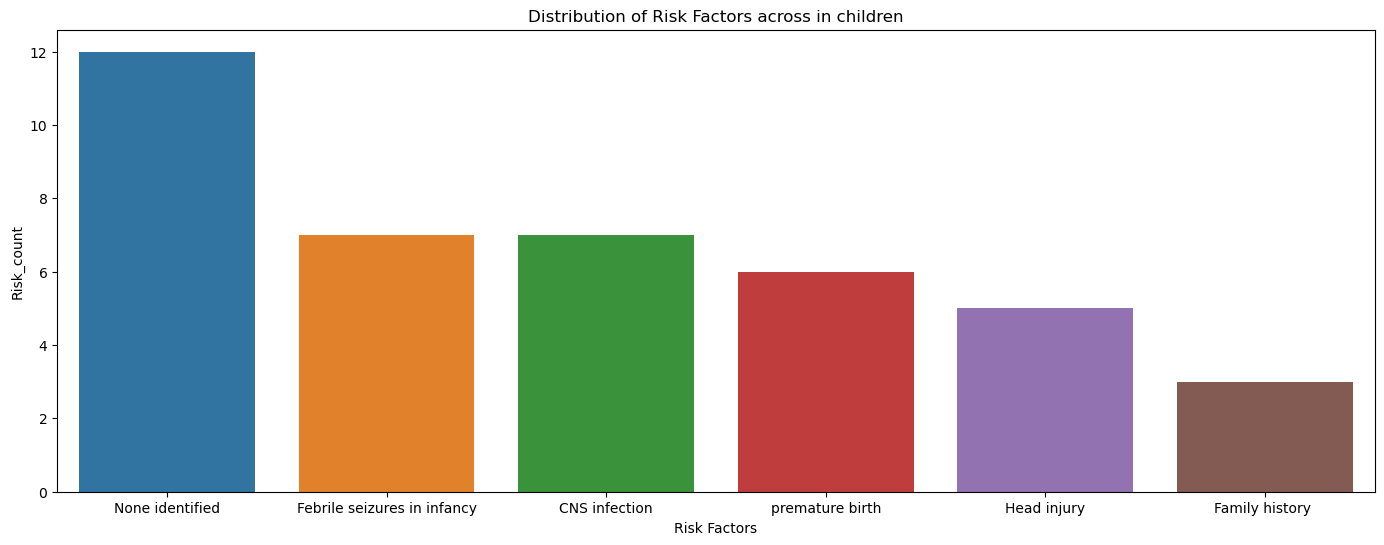

In [179]:
plt.figure(figsize= (17 , 6))
sns.barplot( x=  'Risk Factors', y =  'Risk_count', hue='Risk Factors', data = df_risk) 
plt.title('Distribution of Risk Factors across in children')
print ()




None identified (12 cases): In a significant portion of children, no clear risk factor is identified for their epilepsy, indicating that unknown or genetic factors could be at play.

Febrile seizures in infancy (7 cases): A history of febrile seizures, often occurring during early childhood due to high fevers, is a common precursor to epilepsy in children.

CNS infection (7 cases): Central nervous system infections, like meningitis, are a key risk factor, contributing to seizure development in some children.

Premature birth (6 cases): Children born prematurely have a higher risk of developing epilepsy, likely due to complications during early brain development.

Head injury (5 cases): Trauma or injury to the head is another notable risk factor for epilepsy in children, though less common than the others listed.

These insights emphasize the varied causes of epilepsy in children, with no clear risk factor being the most frequent, followed by febrile seizures and CNS infections.

# ADULTS

In [173]:
query="""SELECT `Risk Factors`, COUNT(*) as Risk_count
FROM nos_project
WHERE category = 'adult'
GROUP BY`Risk Factors`
order by Risk_count desc
;"""
df_riskad =  pd.read_sql(query, con =engine)
df_riskad.head()

,Risk Factors,Risk_count
0,Neurocysticercosis,14
1,Stroke,7
2,Idiopathic,5
3,Head injury,4
4,CNS Infection,4


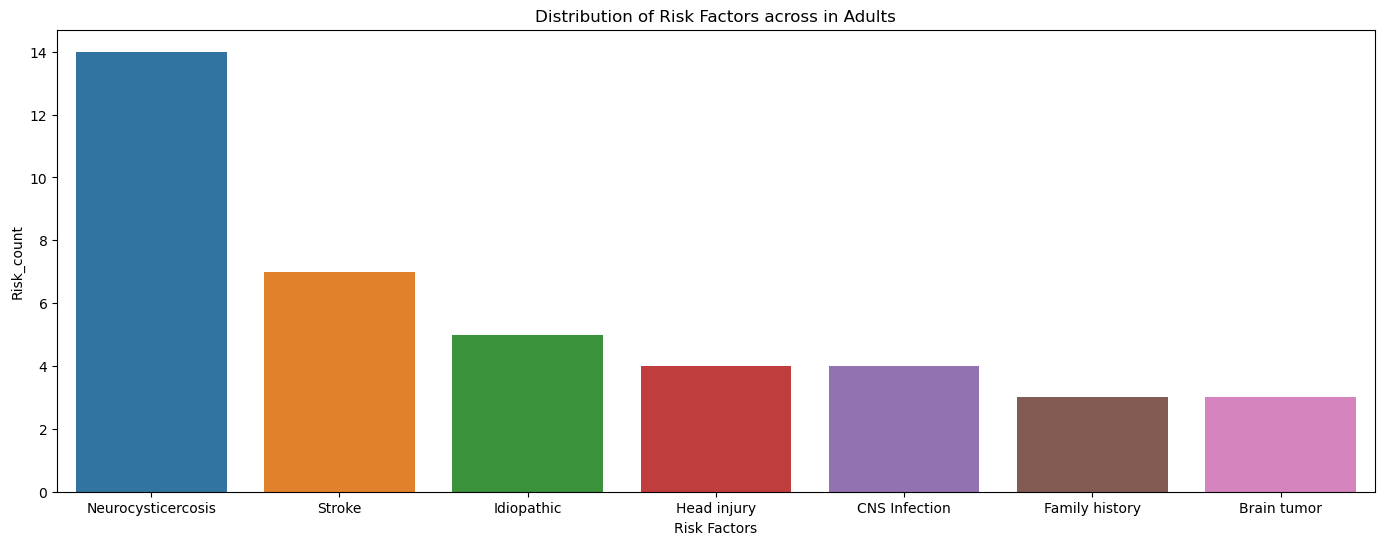

In [175]:
plt.figure(figsize= (17 , 6))
sns.barplot( x=  'Risk Factors', y =  'Risk_count', hue='Risk Factors', data = df_riskad)
plt.title('Distribution of Risk Factors across in Adults')
print ()


Neurocysticercosis (14 cases): This parasitic infection, caused by the pork tapeworm, is the most significant risk factor for epilepsy in adults, particularly in regions where it is endemic. It underscores the link between infectious diseases and neurological conditions.

Stroke (7 cases): Stroke is a major contributor to epilepsy in adults, likely due to brain damage caused by interrupted blood flow, which can lead to seizures.

Idiopathic (5 cases): A number of cases have no identifiable cause (idiopathic epilepsy), which highlights the presence of genetic or unknown factors in adult epilepsy.

Head injury (4 cases): Traumatic brain injuries, often from accidents or falls, are also a notable cause of epilepsy in adults, though less frequent than the above factors.

CNS Infection (4 cases): Infections affecting the central nervous system, such as meningitis or encephalitis, are another risk factor in adults, though they are less common than neurocysticercosis and stroke.

These insights indicate that neurocysticercosis is a dominant cause of epilepsy in adults, with stroke and head injury also being significant risk factors.

# ADOLESCENTS

In [169]:
query="""SELECT `Risk Factors`, COUNT(*) as Risk_count
FROM nos_project
WHERE category = 'adolescent'
GROUP BY`Risk Factors`
order by Risk_count desc
;"""
df_riskadl =  pd.read_sql(query, con =engine)
df_riskadl.head()

,Risk Factors,Risk_count
0,None,10
1,CNS infection,8
2,Family history,6
3,Brain tumor,3
4,Head injury,3


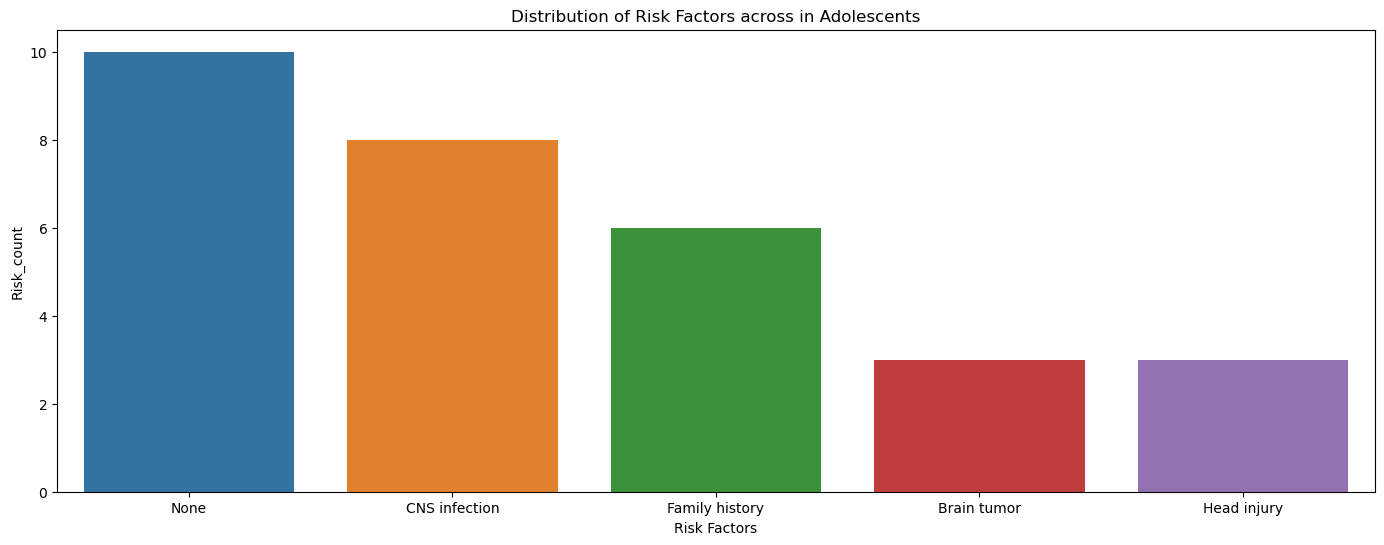

In [171]:
plt.figure(figsize= (17 , 6))
sns.barplot( x=  'Risk Factors', y =  'Risk_count', hue='Risk Factors', data = df_riskadl)
plt.title('Distribution of Risk Factors across in Adolescents')
print ()

None (10 cases): A significant number of adolescents with epilepsy have no identifiable risk factors, suggesting the potential role of genetic or idiopathic causes.

CNS infection (8 cases): Infections affecting the central nervous system, such as meningitis or encephalitis, are a major risk factor in adolescents. This highlights the vulnerability of younger individuals to infections leading to epilepsy.

Family history (6 cases): A notable portion of cases in adolescents are linked to a family history of epilepsy, indicating a genetic predisposition to the condition.

Brain tumor (3 cases) and Head injury (3 cases): These factors contribute to epilepsy in a smaller percentage of adolescents, indicating that while serious, they are less common than infections or genetic predispositions.

Overall, CNS infections and family history are the most notable risk factors for epilepsy in adolescents, though a substantial portion of cases show no identifiable cause.

# 5. The relationship between brain scan findings and Age category

# CHILDREN

In [163]:
query="""SELECT `Brain Scan`, COUNT(*) as scan_Count
FROM nos_project
WHERE category = 'children'
GROUP BY`Brain Scan`
Order by scan_count desc

;"""
df_bsc =  pd.read_sql(query, con =engine)
df_bsc.head()

,Brain Scan,scan_Count
0,MRI: No abnormalities,10
1,CT scan:Arterivenous malformation,7
2,MRI: Ischemic infarcts,7
3,MRI: hippocampal sclerosis,6
4,MRI: Brain contusions,5


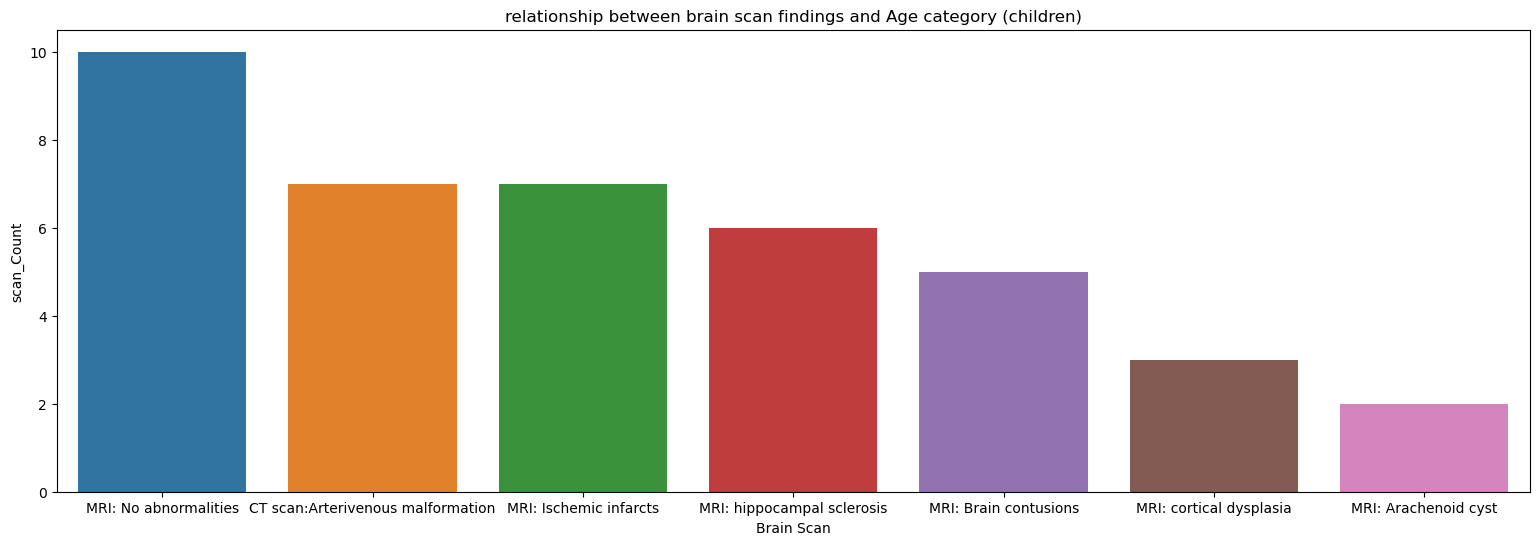

In [165]:
plt.figure(figsize= (19 , 6))
sns.barplot( x= 'Brain Scan' , y = 'scan_Count', hue= 'Brain Scan', data = df_bsc) 
plt.title('relationship between brain scan findings and Age category (children)')
print ()

MRI: No abnormalities (10 cases): A considerable number of children with epilepsy show no abnormalities on MRI scans, indicating the possibility of idiopathic or non-structural causes for their seizures.

CT scan: Arteriovenous malformation (7 cases): This is a notable finding in several cases, where abnormal blood vessel formations in the brain are linked to epilepsy, highlighting the importance of neurovascular causes in children.

MRI: Ischemic infarcts (7 cases): Ischemic strokes or lack of blood flow to brain regions are also significant contributors, affecting a similar number of children.

MRI: Hippocampal sclerosis (6 cases): Damage to the hippocampus, a region critical for memory and learning, is a common abnormality in children with epilepsy, potentially linked to prolonged or severe seizures.

MRI: Brain contusions (5 cases): Head injuries resulting in brain contusions are less frequent but still an important cause of epilepsy in children, emphasizing the need for prevention and care in traumatic injuries.ns	5


# ADULTS

In [15]:
query="""SELECT `Brain Scan`, COUNT(*) as scan_Count
FROM nos_project
WHERE category = 'adult'
GROUP BY`Brain Scan` 
Order by scan_count desc
;"""
df_bsa =  pd.read_sql(query, con =engine)
df_bsa.head(10)


df_bsa_cleaned = df_bsa[df_bsa['Brain Scan'] != '']
df_bsa_cleaned.head(10)




,Brain Scan,scan_Count
0,Normal,9
1,cystic lesions,9
2,Brain contusion,4
3,Cerebral atrophy,3
4,Brain tumor,3
5,Cerebral edema,3
6,hyperintensities DWI,3
7,hyperintensities T1WI,2
8,Hippocampal sclerosis,2
10,hyperintensities T1WI,1


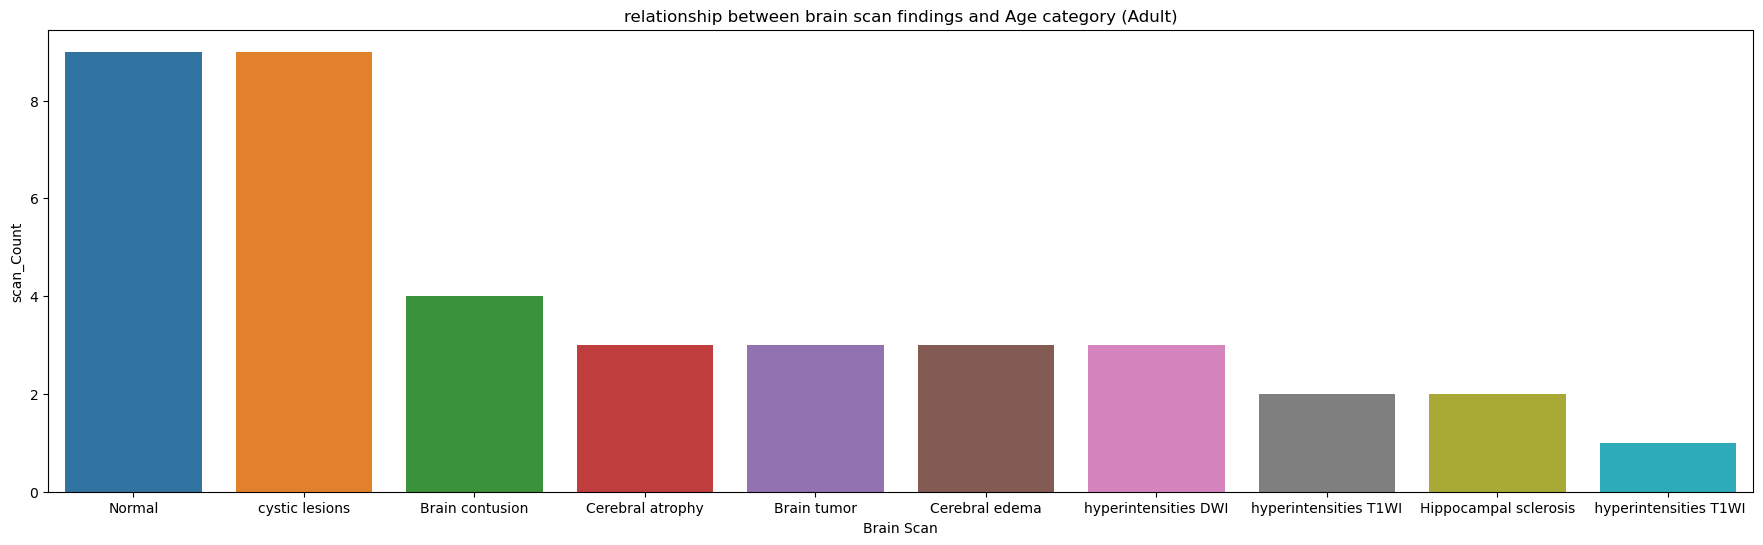

In [161]:
plt.figure(figsize= (22 , 6))
sns.barplot( x= 'Brain Scan' , y = 'scan_Count', hue= 'Brain Scan', data = df_bsa_cleaned) 
plt.title('relationship between brain scan findings and Age category (Adult)')
print ()

Normal (9 cases): A significant portion of adults with epilepsy had normal brain scans, suggesting non-structural or idiopathic causes for their seizures.

Cystic lesions (9 cases): Cystic formations in the brain are a frequent finding, which could be linked to infections like neurocysticercosis or other conditions causing brain cysts.

Brain contusion (4 cases): Traumatic brain injuries leading to contusions are also a notable cause of epilepsy in adults.

Cerebral atrophy (3 cases): This finding, indicative of brain tissue loss, can be associated with degenerative conditions or previous brain insults, contributing to epilepsy.

Brain tumor (3 cases): The presence of brain tumors, though less frequent, is a serious structural cause of seizures in adults.

Cerebral edema (3 cases): Swelling in the brain, often due to trauma or infection, is another structural abnormality seen in some adults with epilepsy.

Hyperintensities on DWI and T1WI (multiple cases): These findings indicate areas of abnormal brain activity or damage, potentially due to ischemia or other pathologies.

Hippocampal sclerosis (2 cases): Similar to findings in children, hippocampal damage is also present in adults, known to be a common cause of temporal lobe epilepsy.

In summary, while some adults with epilepsy show no abnormalities, structural issues like cystic lesions, brain contusions, and brain tumors contribute significantly to their condition.

# ADOLESCENTS

In [129]:
query="""SELECT `Brain Scan`, COUNT(*) as scan_Count
FROM nos_project
WHERE category = 'adolescent'
GROUP BY`Brain Scan` 
Order by scan_count desc
;"""
df_bsad =  pd.read_sql(query, con =engine)
df_bsad

,Brain Scan,scan_Count
0,Cerebral leisons,8
1,Normal,7
2,Hippocampal sclerosis,5
3,Brain tumor,3
4,Brain contusion,3
5,Cerebral atrophy,2
6,Cortical dysplasia,2


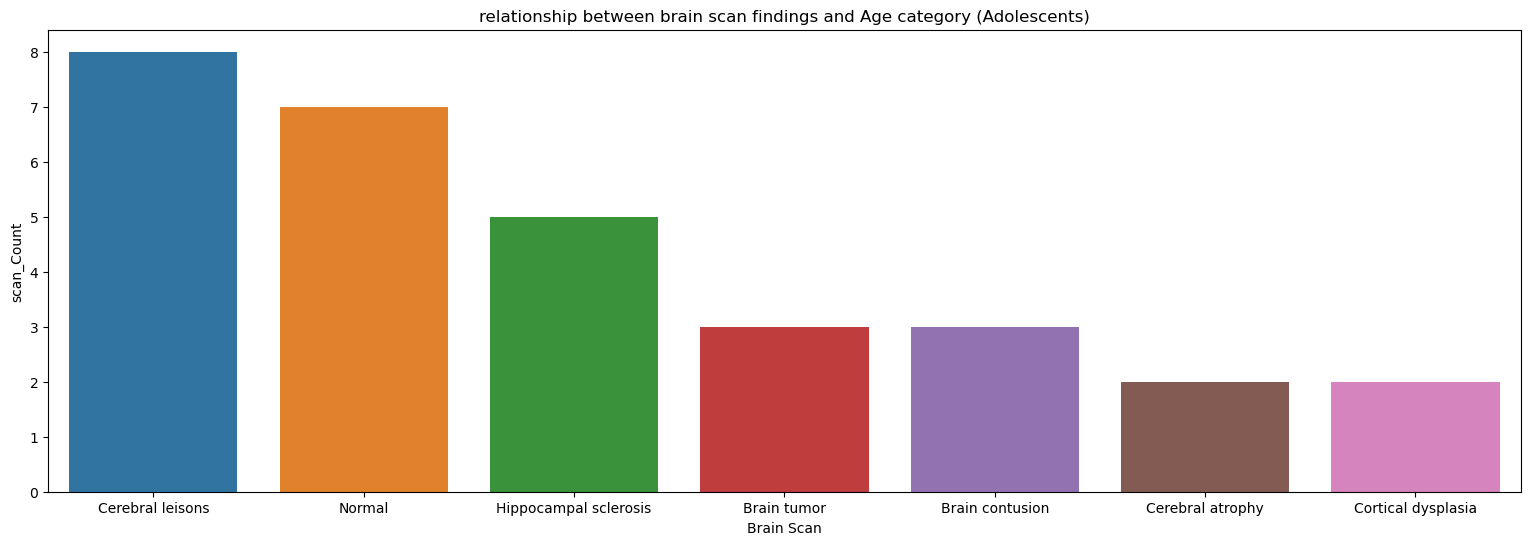

In [133]:
plt.figure(figsize= (19 , 6))
sns.barplot( x= 'Brain Scan' , y = 'scan_Count', hue= 'Brain Scan', data = df_bsad) 
plt.title('relationship between brain scan findings and Age category (Adolescents)')
print ()

Cerebral lesions (8 cases): Most common finding, indicating structural changes.
Normal (7 cases): A notable number show no abnormalities.
Hippocampal sclerosis (5 cases): Linked to temporal lobe epilepsy.
Brain tumor (3 cases): Requires careful evaluation.
Brain contusion (3 cases): Past injuries may contribute to seizures.
Cerebral atrophy (2 cases): Indicates reduced brain volume.
Cortical dysplasia (2 cases): Abnormal brain development.

# 5. DRUG OF CHOICE

# CHILDREN

In [121]:
query=""" SELECT `Medications`, COUNT(*) as med_Count
FROM nos_project
WHERE category = 'children'
GROUP BY `Medications`
Order by med_count desc
;"""

df_medc =  pd.read_sql(query, con =engine)
df_medc

,Medications,med_Count
0,Sod. valproate,12
1,Clobazam,9
2,Levetiracetam,6
3,Ethosuximide,6
4,carbamazepine,4
5,Phenobabital,2
6,Lamotrigine,1


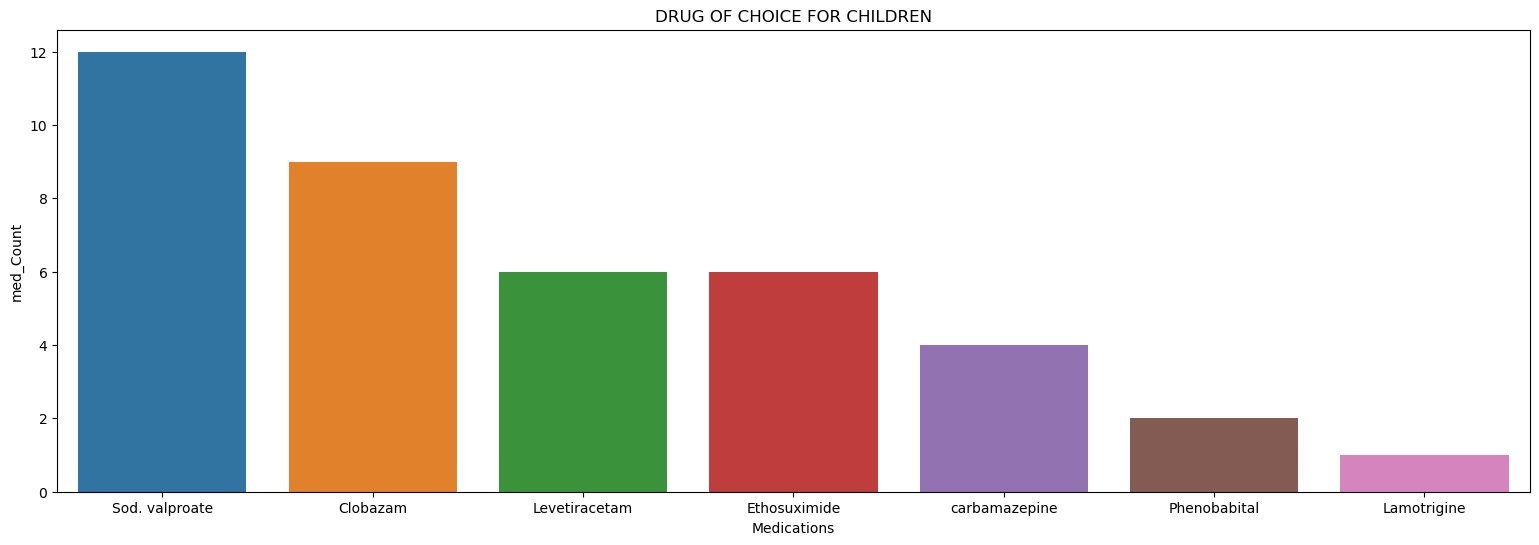

In [123]:
plt.figure(figsize= (19 , 6))
sns.barplot( x= 'Medications' , y = 'med_Count', hue= 'Medications', data = df_medc) 
plt.title('DRUG OF CHOICE FOR CHILDREN')
print ()

Sodium Valproate is the most frequently used medication among children, with a count of 12. This suggests it is a preferred or commonly prescribed medication.

Clobazam follows closely with 9 instances, indicating significant use as well.

Levetiracetam and Ethosuximide both have a moderate usage with 6 counts each.

Carbamazepine is less frequently prescribed with a count of 4.

Phenobarbital and Lamotrigine are used sparingly, with 2 and 1 counts respectively, indicating they are less common or may be used in more specific or rare cases.

# ADULTS

In [204]:
query=""" SELECT `Medications`, COUNT(*) as med_Count
FROM nos_project
WHERE category = 'adult'
GROUP BY `Medications`
Order by med_count desc
;"""

df_meda =  pd.read_sql(query, con =engine)
df_meda

,Medications,med_Count
0,Valproic acid,16
1,Carbamazepine,8
2,Levetiracetam,6
3,Ethosuximide,4
4,Lamotrigine,4
5,Topiramate,2


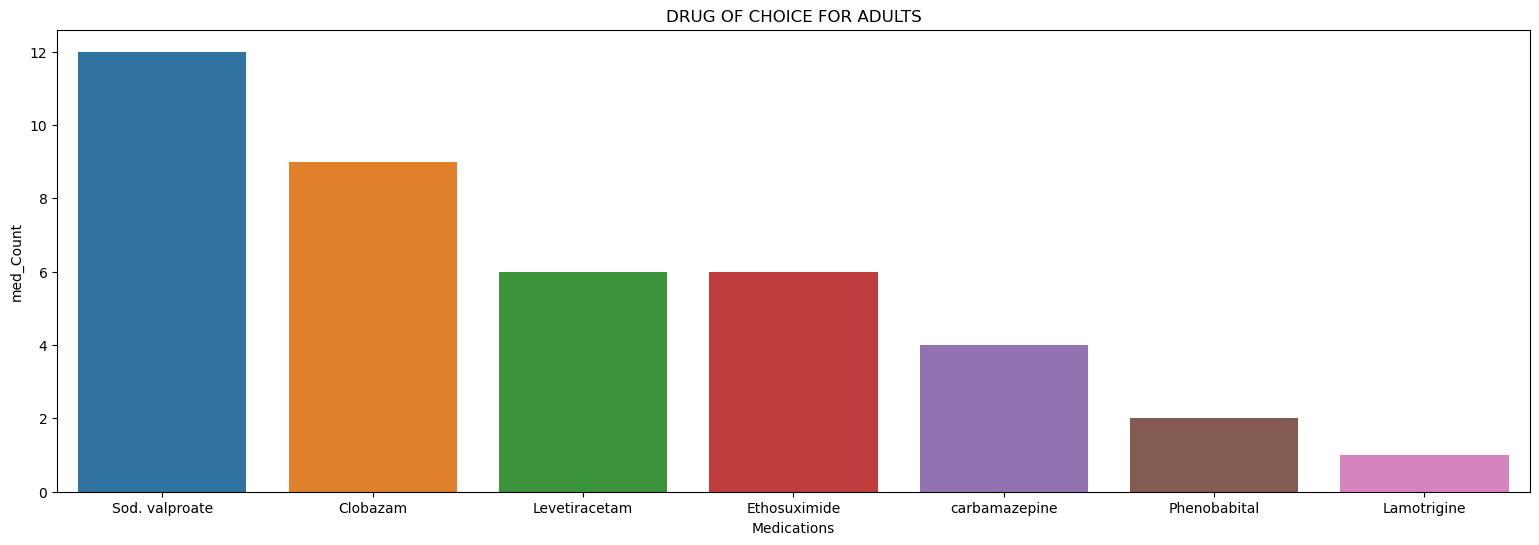

In [206]:
plt.figure(figsize= (19 , 6))
sns.barplot( x= 'Medications' , y = 'med_Count', hue= 'Medications', data = df_medc) 
plt.title('DRUG OF CHOICE FOR ADULTS')
print ()

Valproic Acid is the most commonly prescribed medication, with a count of 16, indicating it is a widely preferred choice for adults, potentially due to its broad effectiveness in managing conditions like epilepsy or mood disorders.

Carbamazepine comes next with 8 prescriptions, showing significant usage, likely for seizure control and possibly for mood stabilization in bipolar disorder.

Levetiracetam has a moderate usage, with 6 counts, suggesting it is also a common option for adults.

Ethosuximide and Lamotrigine are prescribed in 4 cases each, indicating their selective use, potentially for specific seizure types or conditions.

Topiramate, with just 2 counts, is the least frequently used, possibly reserved for specific scenarios or used as an adjunct therapy.

# ADOLESCENTS 

In [217]:
query=""" SELECT `Medications`, COUNT(*) as med_Count
FROM nos_project
WHERE category = 'adolescent'
GROUP BY `Medications`
Order by med_count desc
;"""

df_medad =  pd.read_sql(query, con =engine)
df_medad

,Medications,med_Count
0,Valproic acid,10
1,Carbamazepine,6
2,Levetiracetam,4
3,Lamotrigine,4
4,Ethosuximide,3
5,Topiramate,3


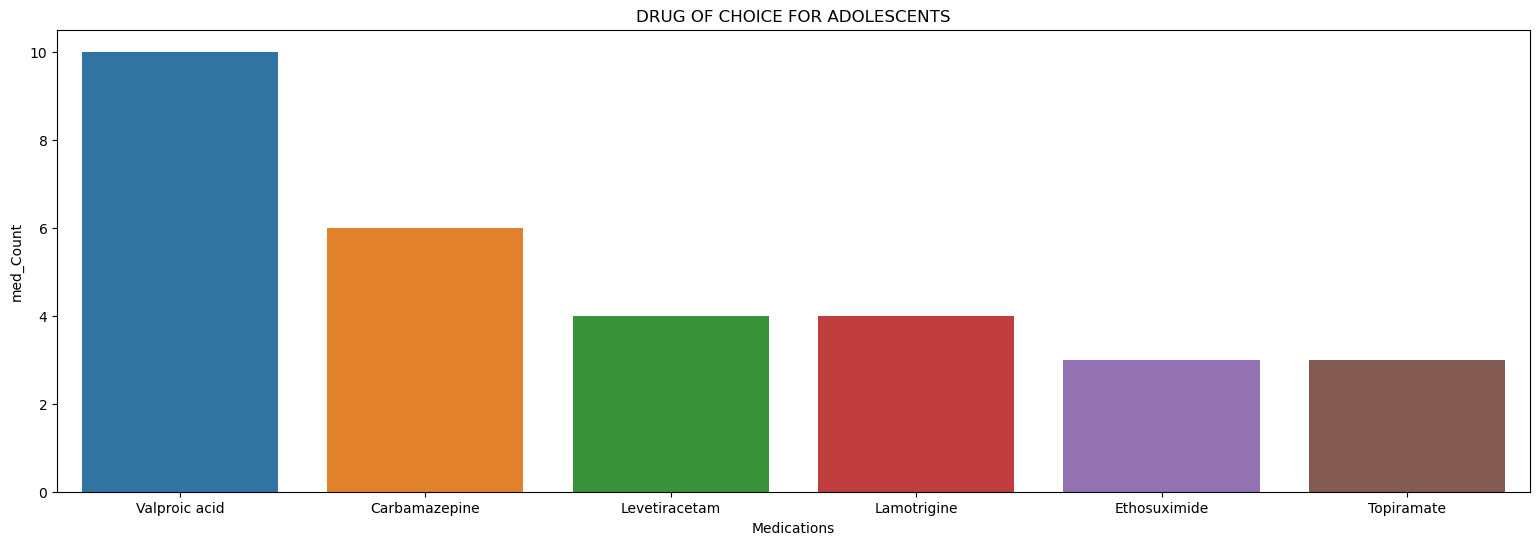

In [221]:
plt.figure(figsize= (19 , 6))
sns.barplot( x= 'Medications' , y = 'med_Count', hue= 'Medications', data = df_medad) 
plt.title('DRUG OF CHOICE FOR ADOLESCENTS')
print ()

Valproic Acid is the most commonly prescribed medication, with a count of 10, making it the preferred option among adolescents, likely for managing epilepsy, mood disorders, or other neurological conditions.

Carbamazepine comes next with 6 prescriptions, indicating a strong presence in adolescent treatment protocols, potentially for seizure control or bipolar disorder management.

Levetiracetam and Lamotrigine are both prescribed 4 times, showing they are moderately used, likely for specific seizure types or as alternative treatment options.

Ethosuximide and Topiramate are each prescribed 3 times, suggesting more selective or targeted use, possibly in cases where more common medications are not as effective or have adverse effects.

# STATISTICAL ANALYSIS

# DESCRIPTIVE STATISTICS

In [12]:

# Define age ranges
children = df_data_table[df_data_table['Age'] < 12] 
adolescents = df_data_table[(df_data_table['Age'] >= 13) & (df_data_table['Age'] < 19)]  
adults = df_data_table[df_data_table['Age'] >= 20]  
# Calculate mean age and standard deviation for each group
mean_age_children = children['Age'].mean()
std_age_children = children['Age'].std()

mean_age_adolescents = adolescents['Age'].mean()
std_age_adolescents = adolescents['Age'].std()

mean_age_adults = adults['Age'].mean()
std_age_adults = adults['Age'].std()

# Print the results with mean age and standard deviation together
print(f"Children: Mean Age = {mean_age_children:.2f}, Standard Deviation = {std_age_children:.2f}")
print(f"Adolescents: Mean Age = {mean_age_adolescents:.2f}, Standard Deviation = {std_age_adolescents:.2f}")
print(f"Adults: Mean Age = {mean_age_adults:.2f}, Standard Deviation = {std_age_adults:.2f}")

# Frequency distribution of seizure types
seizure_counts = df_data_table['Type of seizure'].value_counts()

print("\nSeizure Types Distribution:\n", seizure_counts)


Children: Mean Age = 7.47, Standard Deviation = 2.05
Adolescents: Mean Age = 15.72, Standard Deviation = 1.43
Adults: Mean Age = 53.70, Standard Deviation = 12.92

Seizure Types Distribution:
 Type of seizure
Generalized tonic-clonic     25
Complex partial seizures     20
Absence seizures             17
Generalized tonic-clonic     12
Myoclonic seizures           11
Atonic seizures               7
Simple partial seizures       7
Tonic seizures                5
Atonic epilepsy               3
Partial seizures              2
clonic seizures               1
Name: count, dtype: int64


Age Distribution:

Children: The mean age is 7.47 years with a standard deviation of 2.05 years, indicating that most children with seizures are between 5 and 10 years old.

Adolescents: The mean age is 15.72 years with a standard deviation of 1.43 years, showing that adolescents are typically in their mid-teens, with little age variation.

Adults: The mean age is 53.70 years with a standard deviation of 12.92 years, indicating a broader age range, with adults primarily in their 40s to 60s.

Seizure Types Distribution:

Generalized Tonic-Clonic Seizures dominate, with a total of 37 cases (25 + 12), indicating it as the most common type.
Complex Partial Seizures and Absence Seizures follow, with 20 and 17 cases, respectively, indicating significant prevalence across all age groups.
Other seizure types such as Myoclonic, Atonic, and Simple Partial Seizures show a diverse range of conditions, though less frequent.

# Chi-Square Test

Chi-square statistic: 77.32205882352942, p-value: 1.1128350608353543e-08


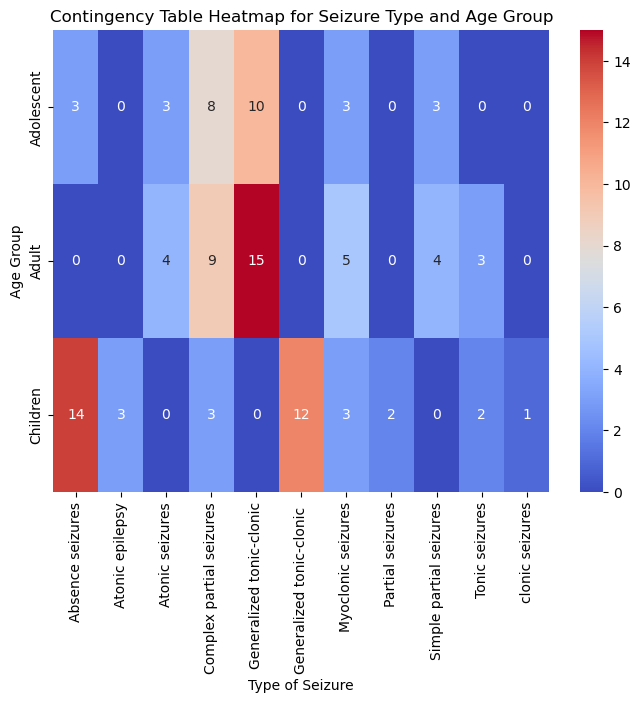

In [72]:
from scipy.stats import chi2_contingency

# Create a contingency table for seizure type and age group
contingency_table = pd.crosstab(df_data_table['Category'], df_data_table['Type of seizure'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")

# Heatmap for observed counts
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', cbar=True)
plt.title('Contingency Table Heatmap for Seizure Type and Age Group')
plt.ylabel('Age Group')
plt.xlabel('Type of Seizure')
plt.show()


In [57]:
print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 77.32205882352942, p-value: 1.1128350608353543e-08


Chi-square statistic: 77.32

A high chi-square value (77.32 in your case) indicates that there is a significant difference between the observed and expected frequencies of seizure types across different age groups.
This means that the observed distribution of seizure types is not what we would expect if there were no relationship between the age group and seizure type. In simpler terms, the age group and seizure type are likely related.

p-value: 1.11e-08

A p-value of 1.11e-08 is an extremely small number (essentially 0.0000000111), which is much less than the typical threshold of 0.05.
Since your p-value is very low, you can reject the null hypothesis. This suggests that there is a statistically significant relationship between the age group and the type of seizure.

Conclusion:

The result shows that there is strong evidence that the type of seizure is associated with age group. In other words, certain seizure types are more likely to occur in specific age groups, and this relationship is unlikely to be due to random chance.

# One-Way ANOVA

F-statistic: 15.436645109134872, p-value: 6.01343062263159e-06


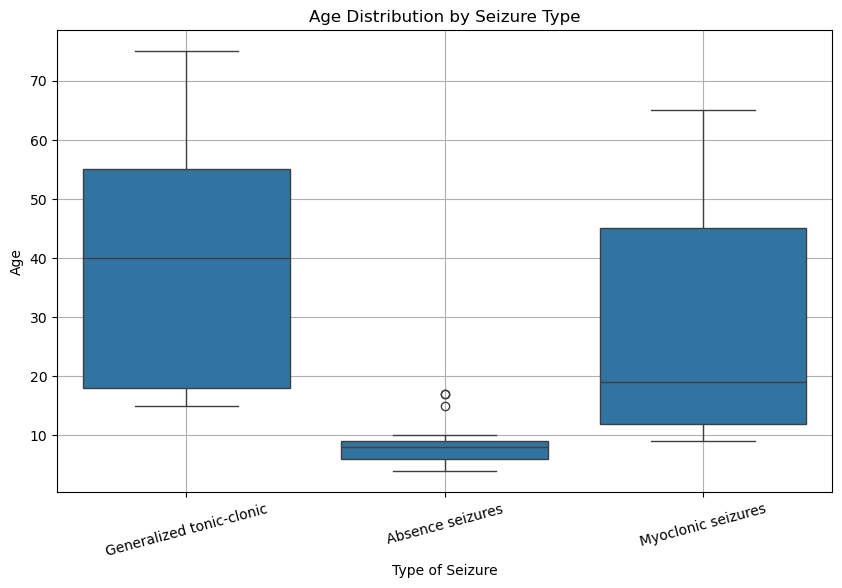

In [79]:
from scipy.stats import f_oneway

# Grouping by 'Type of seizure'
group1 = df_data_table[df_data_table['Type of seizure'] == 'Generalized tonic-clonic']['Age']
group2 = df_data_table[df_data_table['Type of seizure'] == 'Absence seizures']['Age']
group3 = df_data_table[df_data_table['Type of seizure'] == 'Myoclonic seizures']['Age']

# ANOVA test
f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of seizure', y='Age', data=df_data_table, 
            order=['Generalized tonic-clonic', 'Absence seizures', 'Myoclonic seizures'])
plt.title('Age Distribution by Seizure Type')
plt.xlabel('Type of Seizure')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=15)
plt.show()

The result of your ANOVA test with the F-statistic: 15.4366 and p-value: 6.01e-06 indicates the following:

F-statistic (15.4366): This value measures how much the group means (ages for each seizure type) differ from each other, compared to the variation within each group. A higher F-statistic suggests greater differences between the groups.

p-value (6.01e-06): The p-value indicates the probability of obtaining the observed results if there were no real differences between the age distributions across the seizure types. A very small p-value (like 6.01e-06) suggests that there is a statistically significant difference in the average ages of people with Generalized tonic-clonic, Absence seizures, and Myoclonic seizures.

Conclusion:
Since the p-value is much smaller than a common significance level (e.g., 0.05), we reject the null hypothesis. This means that there are significant differences in the average ages of individuals with these three types of seizures. The ages of patients with Generalized tonic-clonic, Absence seizures, and Myoclonic seizures are not the same, and the seizure type seems to be associated with age.

# conclusion 

This pilot study on new-onset epilepsy highlights key differences across age groups. Generalized tonic-clonic seizures are the most common, with metabolic imbalances and neuroimaging abnormalities prevalent in all groups. Children and adolescents show less variability in age, while adults exhibit wider age ranges and more comorbidities. The study emphasizes the importance of tailored diagnostics and treatment approaches, contributing valuable insights to epilepsy management.